In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ukr = pd.read_csv("2022-02-01-2023-02-01-Europe-Ukraine.csv", low_memory = False)

In [3]:
df_ukr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38923 entries, 0 to 38922
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           38923 non-null  int64  
 1   iso               38923 non-null  int64  
 2   event_id_cnty     38923 non-null  object 
 3   event_id_no_cnty  38923 non-null  int64  
 4   event_date        38923 non-null  object 
 5   year              38923 non-null  int64  
 6   time_precision    38923 non-null  int64  
 7   event_type        38923 non-null  object 
 8   sub_event_type    38923 non-null  object 
 9   actor1            38923 non-null  object 
 10  assoc_actor_1     2049 non-null   object 
 11  inter1            38923 non-null  int64  
 12  actor2            17873 non-null  object 
 13  assoc_actor_2     5057 non-null   object 
 14  inter2            38923 non-null  int64  
 15  interaction       38923 non-null  int64  
 16  region            38923 non-null  object

In [4]:
df_ukr.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [5]:
columns = ['event_date', 'event_type', 'sub_event_type', 'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude', 'notes', 'fatalities', 'timestamp']
df_ukr = df_ukr[columns]
df_ukr['notes'] = df_ukr['notes'].str.lower()

In [6]:
df_ukr['date'] = pd.to_datetime(df_ukr['event_date'])
df_ukr['month_year'] = df_ukr['date'].dt.to_period('M')

In [7]:
df_ukr.head()

,event_date,event_type,sub_event_type,admin1,admin2,admin3,location,latitude,longitude,notes,fatalities,timestamp,date,month_year
0,27 January 2023,Battles,Armed clash,Donetsk,Bakhmutskyi,Bakhmutska,Bakhmut,48.5956,37.9999,"on 27 january 2023, russian forces shelled, as...",0,1675191966,2023-01-27,2023-01
1,27 January 2023,Battles,Armed clash,Donetsk,Bakhmutskyi,Soledarska,Bilohorivka,48.7329,38.2154,"on 27 january 2023, russian forces shelled, as...",0,1675191966,2023-01-27,2023-01
2,27 January 2023,Battles,Armed clash,Donetsk,Kramatorskyi,Konstantinovskaya,Druzhba,48.4098,37.9104,"on 27 january 2023, russian forces shelled, as...",0,1675191966,2023-01-27,2023-01
3,27 January 2023,Battles,Armed clash,Donetsk,Bakhmutskyi,Bakhmutska,Ivanivske,48.5722,37.9174,"on 27 january 2023, russian forces assaulted, ...",0,1675191966,2023-01-27,2023-01
4,27 January 2023,Battles,Armed clash,Donetsk,Bakhmutskyi,Bakhmutska,Klischiivka,48.5279,37.9582,"on 27 january 2023, russian forces shelled, as...",0,1675191966,2023-01-27,2023-01


In [8]:
df_ukr.groupby(['event_type', 'sub_event_type']).count()

event_date  \
event_type                 sub_event_type                                    
Battles                    Armed clash                                5625   
                           Government regains territory                298   
                           Non-state actor overtakes territory         235   
Explosions/Remote violence Air/drone strike                           2213   
                           Grenade                                       8   
                           Remote explosive/landmine/IED               412   
                           Shelling/artillery/missile attack         27789   
                           Suicide bomb                                  2   
Protests                   Excessive force against protesters           16   
                           Peaceful protest                            188   
                           Protest with intervention                    17   
Riots                      Mob violence                                  3   
                           Violent demonstration                         2   
Strategic developments     Agreement                                    23   
                           Arrests                                       9   
                           Change to group/activity                     51   
                           Disrupted weapons use                       712   
                           Headquarters or base established              1   
                           Looting/property destruction                149   
                           Non-violent transfer of territory           117   
                           Other                                       354   
Violence against civilians Abduction/forced disappearance              304   
                           Attack                                      372   
                           Sexual violence                              23   

                                                                admin1  \
event_type                 sub_event_type                                
Battles                    Armed clash                            5624   
                           Government regains territory            298   
                           Non-state actor overtakes territory     235   
Explosions/Remote violence Air/drone strike                       2213   
                           Grenade                                   8   
                           Remote explosive/landmine/IED           412   
                           Shelling/artillery/missile attack     27786   
                           Suicide bomb                              2   
Protests                   Excessive force against protesters       16   
                           Peaceful protest                        188   
                           Protest with intervention                17   
Riots                      Mob violence                              3   
                           Violent demonstration                     2   
Strategic developments     Agreement                                23   
                           Arrests                                   9   
                           Change to group/activity                 51   
                           Disrupted weapons use                   708   
                           Headquarters or base established          1   
                           Looting/property destruction            149   
                           Non-violent transfer of territory       117   
                           Other                                   354   
Violence against civilians Abduction/forced disappearance          304   
                           Attack                                  372   
                           Sexual violence                          23   

                                                                admin2  \
event_type                 sub_event

In [9]:
event = df_ukr['notes'].dropna()

In [10]:
pd.options.display.max_colwidth = 500

In [11]:
event[event.str.contains('residential|building|private house|apartment|shelter|hotel')].count()

1141

In [12]:
event[event.str.contains('residential|building|private house|apartment|shelter|hotel')].head()

145                                                                                                                                                            on 26 january 2023, ukrainian military forces shelled dpr's forces in donetsk - petrovskyi, donetsk, damaging residential buildings. 2 civilians were wounded.
149                                                                                                                                                 on 26 january 2023, ukrainian military forces shelled dpr's forces in horlivka, donetsk, damaging civilian infrastructure and a residential building. casualties unknown.
150                                                                                                                                                                                           on 26 january 2023, russian military forces shelled huliaipole, zaporizhia, damaging residential buildings. casualties unknown.
156                                           

In [13]:
event[event.str.contains('hospital|clinic|blood transfusion centre|ambulance|medical|health|perinatal|maternity')].count()


192

In [14]:
event[event.str.contains('hospital|clinic|blood transfusion centre|ambulance|medical|health|perinatal|maternity')].head()

126                                                                                                                                                        on 26 january 2023, russian military forces shelled bakhmut, donetsk, damaging a children's hospital. 2 civilians were wounded.
262                                                                                                           on 25 january 2023, russian forces shelled bakhmut, donetsk region, having damaged a school, a hospital and the city council building. 1 civilian was killed, 1 was injured.
297                                                                                     on 25 january 2023, russian forces shelled kramatorsk, donetsk region, hitting a local psychiatric hospital. at the time of shelling there were about 20 civilians in the building. no casualties.
350                                                                                                                                                    

In [15]:
# define a function assigning a value to cells based on presence of keywords
# create a new column with tuples of assigned values if any of the keywords are present in the cell
def assign_values(df_column, keyword_value_tuples):
    new_column = []
    for cell in df_column:
        matched_values = []
        for keywords, value in keyword_value_tuples:
            if any(keyword in cell for keyword in keywords):
                matched_values.append(value)
        new_column.append(tuple(matched_values) if matched_values else None)
    return pd.Series(new_column)

In [16]:
# list of keywords to search for
keyword_value_tuples = [
    (('hospital','clinic','blood transfusion centre','ambulance','medical','health','perinatal','maternity'), 'healthcare'),
    (('bridge','transport','vehicle','car','bus','road','railroad','railway','airport','a port','boat','ferry','ship'), 'logistics'),
    (('residential','building','private house','apartment','shelter','hotel'), 'shelter'),
    (('school','kindergarten','college','university','education'), 'education'),
    (('power','powerlines','gas','water','heating','energy','electricity','electrical lines','pipeline'), 'power'),
    (('industial','plant','factory','production'), 'industry'),
    (('cell phone','tv','television','radio','communication','internet','network'), 'telecom'),
    (('farm','agricultural','agrarian','tractor','harvest','field','crops','grain','livestock'), 'agriculture'),
    (('market','supermarket','shop','store','warehouse','mall','shopping','bakery','food'), 'business')]

new_column = assign_values(df_ukr['notes'], keyword_value_tuples)

df_ukr['classification'] = new_column

In [17]:
df_not_none = df_ukr.loc[df_ukr['classification'].notnull(), ['notes', 'classification']]
df_not_none.head(10)


,notes,classification
123,"looting: around 26 january 2023 (as reported), russian forces drove away a new batch of ukrainian grain from berdiansk, zaporizhia.","(agriculture,)"
126,"on 26 january 2023, russian military forces shelled bakhmut, donetsk, damaging a children's hospital. 2 civilians were wounded.","(healthcare,)"
128,"around 26 january 2023 (as reported), russian military forces shelled a civilian car near beryslav, kherson. 2 civilians were wounded.","(logistics,)"
145,"on 26 january 2023, ukrainian military forces shelled dpr's forces in donetsk - petrovskyi, donetsk, damaging residential buildings. 2 civilians were wounded.","(shelter,)"
149,"on 26 january 2023, ukrainian military forces shelled dpr's forces in horlivka, donetsk, damaging civilian infrastructure and a residential building. casualties unknown.","(shelter,)"
150,"on 26 january 2023, russian military forces shelled huliaipole, zaporizhia, damaging residential buildings. casualties unknown.","(shelter,)"
156,"on 26 january 2023, russian military forces shelled residential buildings in kherson, kherson. casualties unknown.","(shelter,)"
168,"on 26 january 2023, russian military forces launched 20 rockets at kyiv, kyiv. all the rockets were intercepted, but the remnants hit non-residential buildings, resulting in death of 1 and injuries of 2 civilians. the same day earlier, russia attacked kyiv with 15 kamikaze-drones, all of which were shot down.","(shelter,)"
179,"on 26 january 2023, russian military forces shelled nova kakhovka, kherson, damaging residential buildings. casualties unknown.","(shelter,)"
189,"on 26 january 2023, ukrainian military forces shelled dpr's forces in oleksandrivka, donetsk, damaging civilian infrastructure and a residential building. casualties unknown.","(shelter,)"


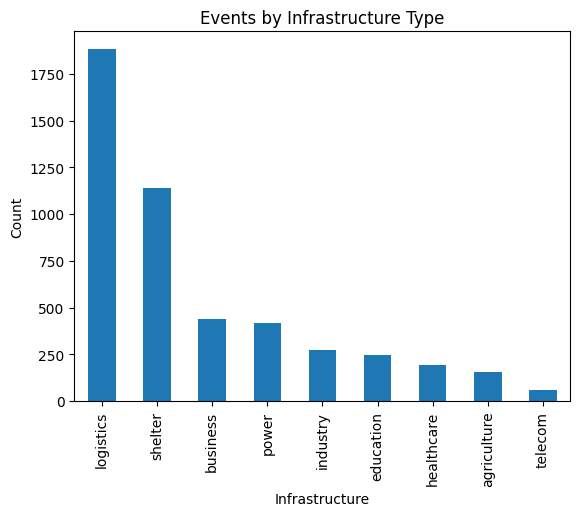

In [18]:
# explode tuples of strings in column 'classification', count occurrences, and plot histogram
counts = df_ukr['classification'].explode().value_counts()
counts.plot(kind='bar')

plt.title('Events by Infrastructure Type')
plt.xlabel('Infrastructure')
plt.ylabel('Count')

plt.show()